# AAI0026 Practice 1: K-means Clustering
The k-means clustering method is an unsupervised learning technique used to identify clusters of data in a dataset. A lot of clustering methods exist, but k-means clustering is one of the approachable methods. Unsupervised learning is the algorithm which treats unlabeled data. Unlabeled data do not have their own name so we can't classify them manually. To cluster the data properly, we need to go through a few steps.

Note: Make sure to sequentially run all the cells in each section, so that the intermediate variables / packages will carry over to the next cell

Have fun!

# Q1. Can you stack the data?
In this section, we will tranform our data's structure. The data is represented by  n x 1 matrix. We need to treat the data appropriately. In many instances, the error of the code results from the wrong data structure. To prevent this problem, we should use  matrix concatenation. In other words, it is called 'stack' 

# Device
You might need to use GPU for this Colab.

Please click `Runtime` and then `Change runtime type`. Then set the `hardware accelerator` to **GPU**.

First of all, the data can be stacked appropriately. Thus far, we can transform the data after the following import statement.

In [1]:
import numpy as np

The following usage is more useful.
#### Hint: vstack, hstack, dstack

In [3]:
X = [1,2,3,4,5]
Y = [6,7,8,9,10]
####### Your Code Here ##########
# (~2 line of code) 
# Write Row and Column seperately
Row = np.vstack([X,Y])
Column = np.hstack([X,Y])
##############################

# Row: makes the data stacking the direction of row
# Column: makes the data stacking the direction of column
print(X, Y, Row, Column, sep='\n\n') 

## There are another methods for concatenation in numpy libraray
## Try to np.c_[X,Y] and np.r_[X,Y]
## But commonly used methods are vstack, hstack and dstack.

[1, 2, 3, 4, 5]

[6, 7, 8, 9, 10]

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]

[ 1  2  3  4  5  6  7  8  9 10]


The next step is 'plot'. The visualization with the plot is a useful tool for checking the result. To use this tool, the following statement is needed.

# Can you visualize your data?

In [4]:
import matplotlib.pyplot as plt

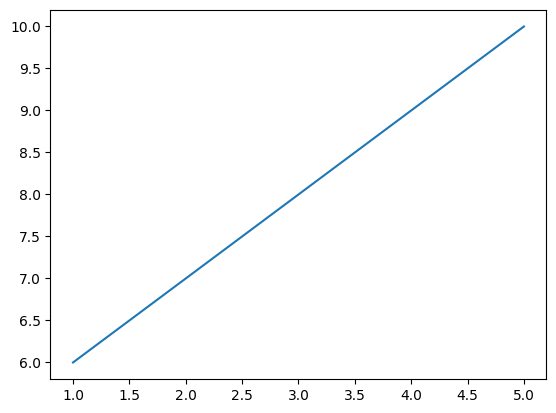

In [5]:
plt.plot(X,Y)

There is also helpful tool for visualization. It is called subplot. Subplot is used when you need to see many plots at the same time. So, you can compare the results easily and briefly.
A rule to use the subplot exist. Its grammar is almost same with normal plot. But there is a difference in the parentheses.


<AxesSubplot: >

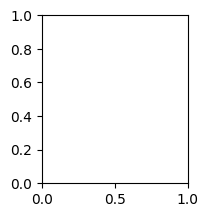

In [6]:
plt.subplot(2,3,1) 

First number of the parentheses means the number of column and the second one means row, the last one is an index number. In this rule, plt.subplot(2,3,1) eventually means that the 2x3 matrix of plot is constructed and the subplot is an (1,1) element.

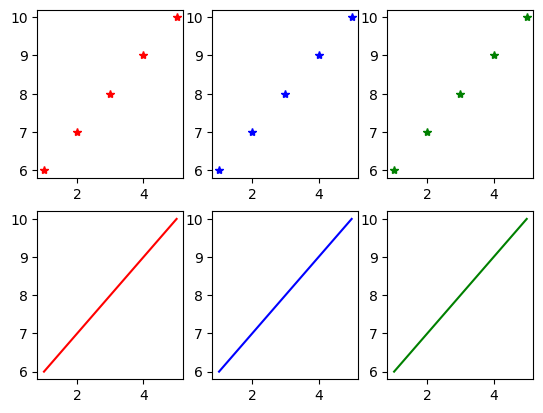

In [7]:
plt.subplot(2,3,1)
plt.plot(X,Y,'r*') ## * is a star marker, r = red, b = blue, g = green
plt.subplot(2,3,2)
plt.plot(X,Y,'b*')
plt.subplot(2,3,3)
plt.plot(X,Y,'g*')
plt.subplot(2,3,4)
plt.plot(X,Y,'r-') 
plt.subplot(2,3,5)
plt.plot(X,Y,'b-')
plt.subplot(2,3,6)
plt.plot(X,Y,'g-')


#  Q2. How to read the file stored outside the program?
The data is sotred in this address
"https://raw.githubusercontent.com/meaning-ful/K-means/main/K-means.txt".

There is a module named pandas. It's one of the most famous and useful modules. There are many types of data structures. One of them is called dataframe. It's the structure for storing 2-dimensional data. The dataframe in pandas includes data's name and index. In other words, the data are labeled. You can read the file stored outside by using 'pd.read_csv' grammar. follow the sentence
#### HINT: Use "pd.read_csv" method

In [14]:
import pandas as pd
dfLoad = pd.read_csv("https://raw.githubusercontent.com/meaning-ful/K-means/main/K-means.txt", 
                     sep = "\t", 
                     header=None
                    )
print(dfLoad)

             0          1
0            X          Y
1     -1.10499   0.948817
2    -0.306807   0.612625
3    -0.202678   0.658715
4    -0.214805  0.0341055
..         ...        ...
576   -1.40885    1.50945
577  -0.706832   0.284357
578  -0.279642   -0.06271
579   -1.18495     1.1642
580  -0.724035    1.32562

[581 rows x 2 columns]


The data file is uploaded in this github:"https://raw.githubusercontent.com/meaning-ful/K-means/main/K-means.txt". Parameter "sep = "\s+" " of pd.read_csv means that there is a blank between adjacent numbers in a row. For example, look at the index 1 data. X = -1.104990 and Y = 0.948817. There is a blank space between two values. So, you need to specify this blank and pd.read_csv with "sep = "\s+" " will take care of the spaces.

# Q3. Can you detach the data from given dataframe?

The preparation to implement an K-means algorithm is done. Now all the import statements are rewritten.

In [15]:
import pandas as pd
import numpy as np

ipl_data ={'Team':['Riders', 'Riders', 'Devils', 'Devils', 'Kings', 'Kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
                  'Rank':[1,2,2,3,3,4,1,1,2,4,1,2], 
                  'Year':[2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017], 
                  'Points':[879,789,863,673,741,812,756,788,694,701,804,690] }
###### Your Code Here #######
# (~2 line of code)
# use np.array
ipl1 = np.array(ipl_data['Team'])
ipl2 = np.array(ipl_data['Rank'])

##########################

print(ipl1)
print(ipl2)


['Riders' 'Riders' 'Devils' 'Devils' 'Kings' 'Kings' 'Kings' 'Kings'
 'Riders' 'Royals' 'Royals' 'Riders']
[1 2 2 3 3 4 1 1 2 4 1 2]


Now we need to visualize it

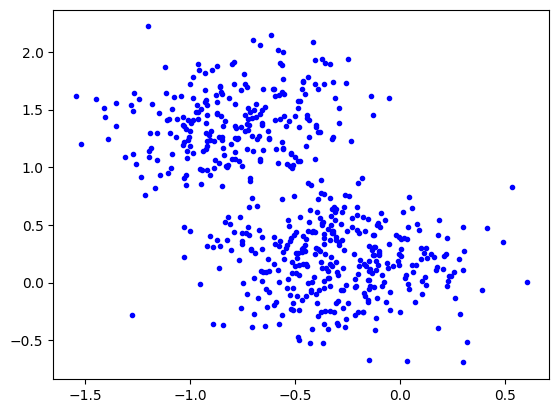

In [38]:
dfLoad = pd.read_csv("https://raw.githubusercontent.com/meaning-ful/K-means/main/K-means.txt", 
                     sep = "\t", 
                    )
#print(dfLoad)
samples = np.array(dfLoad)
#N = len(x)
numK = 2
#samples = np.array(dfLoad)
####### Your Code Here #########
## (~2 lines of code)
## Note: Detach the data stored on the address which is given.
## "https://raw.githubusercontent.com/meaning-ful/K-means/main/K-means.txt".
x = np.array(dfLoad['X'])
y = np.array(dfLoad['Y'])
################################

f1 = plt.figure(1)
ax1 = f1.add_subplot(111)
ax1.plot(x, y, 'b.')


As shown in the chart, it seems difficult to classify these data points manually.

# Q4. How to initialize latent variables?

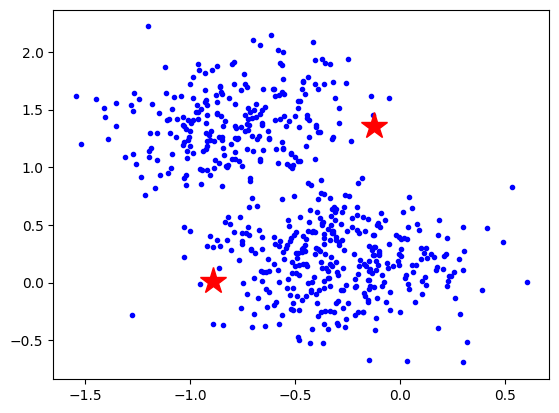

In [39]:
f1 = plt.figure(1)
ax1 = f1.add_subplot(111)
ax1.plot(x, y, 'b.')
[mx, sx] = [np.mean(x), np.std(x)]
[my, sy] = [np.mean(y), np.std(y)]

####### Your Code Here ##########
## (~2 line of code)
# Note. reshape
z0 = [mx-sx, my-sy]
z1 = [mx+sx, my+sy]
#################################

# 확인 필요
# Note 내용에서는 reshape을 사용하는것을 권장
#Z = np.r_[z0, z1]
Z = np.vstack([z0, z1])
ax1.plot(Z[:,0], Z[:,1], 'r*', markersize = '20')


# Implement EM-Algorithm



### Hint: Use 'Groupby' method ###
![test](https://raw.githubusercontent.com/meaning-ful/ASDDSAADSSD/main/groupby.jpg)

In [40]:
## Groupby 
import pandas as pd
import numpy as np

ipl_data ={'Team':['Riders', 'Riders', 'Devils', 'Devils', 'Kings', 'Kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
                  'Rank':[1,2,2,3,3,4,1,1,2,4,1,2], 
                  'Year':[2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017], 
                  'Points':[879,789,863,673,741,812,756,788,694,701,804,690] }
ipl_df = pd.DataFrame(ipl_data) 
####### Your Code Here ##########

## ( ~ 2 line of code)   
## Note: Sum of points by team
ipl_df_groupby = ipl_df.groupby(['Team'])
ipl_df_groupbySum = ipl_df_groupby.sum()
##############################
        
## Sum of points by team

print(ipl_df, '\n')
print(ipl_df_groupby, '\n')
print(ipl_df_groupbySum)

      Team  Rank  Year  Points
0   Riders     1  2014     879
1   Riders     2  2015     789
2   Devils     2  2014     863
3   Devils     3  2015     673
4    Kings     3  2014     741
5    Kings     4  2015     812
6    Kings     1  2016     756
7    Kings     1  2017     788
8   Riders     2  2016     694
9   Royals     4  2014     701
10  Royals     1  2015     804
11  Riders     2  2017     690 


        Rank  Year  Points
Team                      
Devils     5  4029    1536
Kings      9  8062    3097
Riders     7  8062    3052
Royals     5  4029    1505


### Hint: Use 'np.linalg.norm' method ###


In [41]:
import numpy as np

ArrayforNorm = np.array([1, 3, 5, 7])
Norm1 = np.linalg.norm(ArrayforNorm, 1) ## Vector 1-norm
####### Your Code Here ##########

## Vector 2-norm
## Vectpr 3-norm
Norm2 = np.linalg.norm(ArrayforNorm, 2)
Norm3 = np.linalg.norm(ArrayforNorm, 3)
##############################
print(Norm1)
print(Norm2)
print(Norm3)

16.0
9.16515138991168
7.91578321936081


![test](https://raw.githubusercontent.com/meaning-ful/kmenas-pseudo/main/1.%20Psuedo%20Code.png)

In [43]:
N = len(x)
numK = 2

k = np.zeros(N)
j = 0

# Step 1) while(True)
while(True):
    j += 1
    kOld = np.copy(k)
    
# Step 2) for(i = 1 to N)
    for i in np.arange(N):
        ####### Your Code Here ##########
        ## ( ~ 2 line of code)
        z0D = np.linalg.norm(samples[i] - Z[0], 2)
        z1D = np.linalg.norm(samples[i] - Z[1], 2)
        #################################
        
        k[i] = z0D > z1D
# Step3) if(No change of mapping from prev. loop)break        
    if(np.alltrue(kOld == k)):
        break        
        
# Step4) for( j =1 to K)               
    dfCluster = pd.DataFrame(np.c_[x, y, k])
    ####### Your Code Here #########
    ## (~2 lines of code)
    dfCluster.columns = ['X', 'Y', 'K']
    dfGroup = dfCluster.groupby('K')
    ################################
    for cluster in range(numK):
        Z[cluster,:] = dfGroup.mean().iloc[cluster]

# Visualization of Result

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


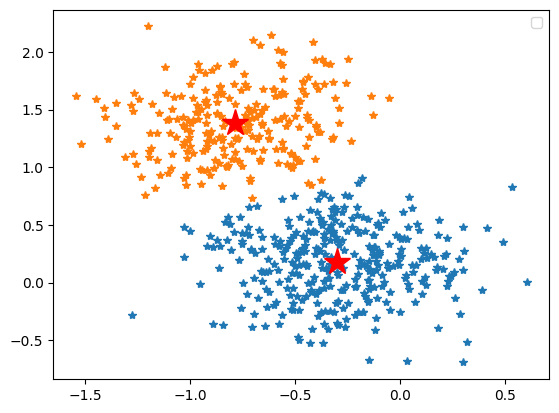

In [50]:
f2 = plt.figure(2)
ax2 = f2.add_subplot(111)
# ax2.plot(x, y, 'b.')
for (cluster, dataInCluster) in dfGroup:
    ####### Your Code Here #########
    ## (~1 lines of code)
    ax2.plot(dataInCluster['X'], dataInCluster['Y'], "*")
    ################################
    #ax2.plot()

ax2.plot(Z[:,0], Z[:,1], 'r*', markersize = '20')
ax2.legend()

# Final code

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


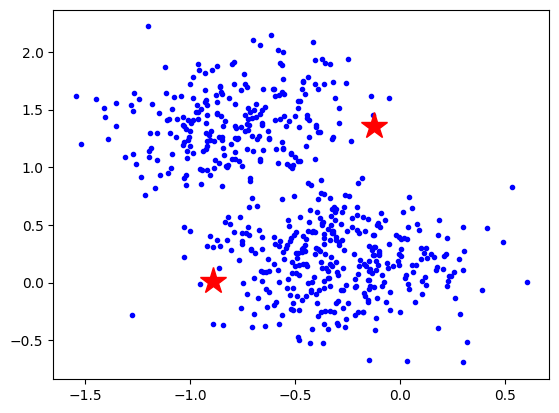

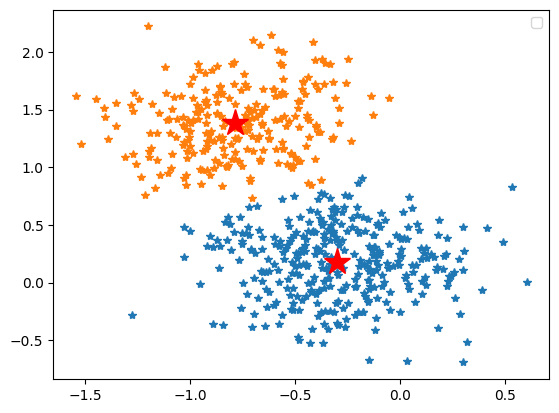

In [52]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import pandas as pd

plt.close("all")

dfLoad = pd.read_csv("https://raw.githubusercontent.com/meaning-ful/K-means/main/K-means.txt",  sep="\s+")

samples = np.array(dfLoad)
####### Your Code Here #########
## (~2 lines of code)
x = samples[:, 0]
y = samples[:, 1]
################################

N = len(x)
numK = 2

f1 = plt.figure(1)
ax1 = f1.add_subplot(111)
ax1.plot(x, y, 'b.')

mx, sx = np.mean(x), np.std(x)
my, sy = np.mean(y), np.std(y)
####### Your Code Here #########
## (~2 lines of code)
z0 = [mx-sx, my-sy]
z1 = [mx+sx, my+sy]
################################

Z = np.vstack([z0, z1])
ax1.plot(Z[:,0], Z[:,1], 'r*', markersize = '20')

k = np.zeros(N)
j = 0

while(True):
    j += 1
    kOld = np.copy(k)
    for i in np.arange(N):

        ####### Your Code Here #########
        ## (~2 lines of code)
        z0D = np.linalg.norm(samples[i] - Z[0], 2)
        z1D = np.linalg.norm(samples[i] - Z[1], 2)
        ################################
        
        k[i] = z0D > z1D
    if(np.alltrue(kOld == k)):
        break        
        
    dfCluster = pd.DataFrame(np.c_[x, y, k])
    ####### Your Code Here #########
    ## (~2 lines of code)
    dfCluster.columns = ['X', 'Y', 'K']
    dfGroup = dfCluster.groupby('K')
    ################################
    
    for cluster in range(numK):
        Z[cluster,:] = dfGroup.mean().iloc[cluster]


f2 = plt.figure(2)
ax2 = f2.add_subplot(111)

for (cluster, dataInCluster) in dfGroup:
    ####### Your Code Here #########
    ## (~1 lines of code)
    ax2.plot(dataInCluster['X'], dataInCluster['Y'], "*")
    ################################

ax2.plot(Z[:,0], Z[:,1], 'r*', markersize = '20')
ax2.legend()

# Submission
In order to get credit, you need to submit the ipynb file to LMS.

To get this file, click File and Download .ipynb. Please make sure that your output of each cell is available in your ipynb file.